# Exercise: Polynomial Regression and Hyperparameters



Briefly explain polynomial regression + Compare hypotesis using regular linear regression with Polynomial regression to illustrate why we need the latter

What are hyperparemeters.

what we are doing in this Exercise

Mention metrics




## Preparing data
Explain the dataset we are using (should plot something similar to an exponential curve)



                             Account ID  Account Age  Total Accrued
0  106440e8-775d-4357-8485-d3923036b6c1           48          41239
1  b2c6c687-9c1a-4171-86d2-3ccf3759931d           12            920
2  db5f9ba8-0b3c-4fed-87fd-665bb273cbda           43          27851
3  73aa1fe8-dece-4aa5-a763-ddee06ef5aab           25           4304
4  213b5e44-60ce-447a-b7c3-12b465828af8           31          12805 



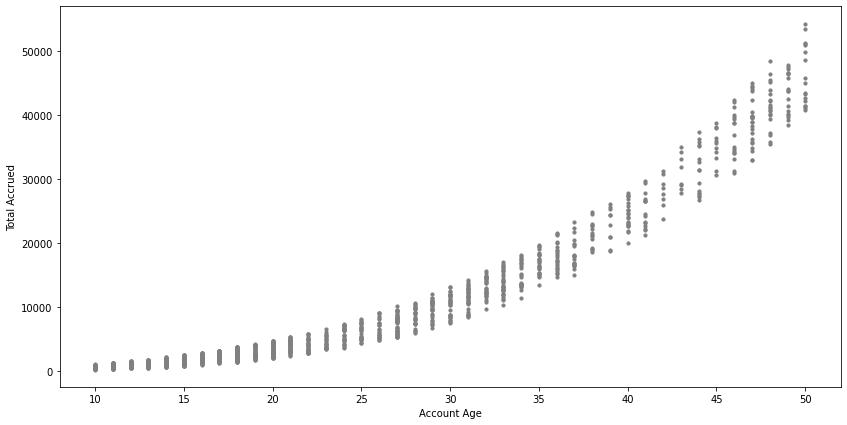

In [1]:
# Import everything we will need for this unit
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


# Load data from our dataset file into a pandas dataframe
dataset = pd.read_csv('Data/investments.csv', index_col=False, sep=",",header=0)

# Check what's in the dataset
print(dataset.head(), "\n")

# Plot dataset points
%matplotlib inline
X = dataset["Account Age"]
y = dataset["Total Accrued"]

f = plt.figure()
f.set_figwidth(14)
f.set_figheight(7)
plt.scatter(X, y, s=10, color="gray")
plt.ylabel('Total Accrued')
plt.xlabel("Account Age")
plt.show()

Explain the dataset above...why it's a curve and why the scatter?

## Polynomial Regression
- Show formula?
- Use Sklearn polynomial + linear to train/test



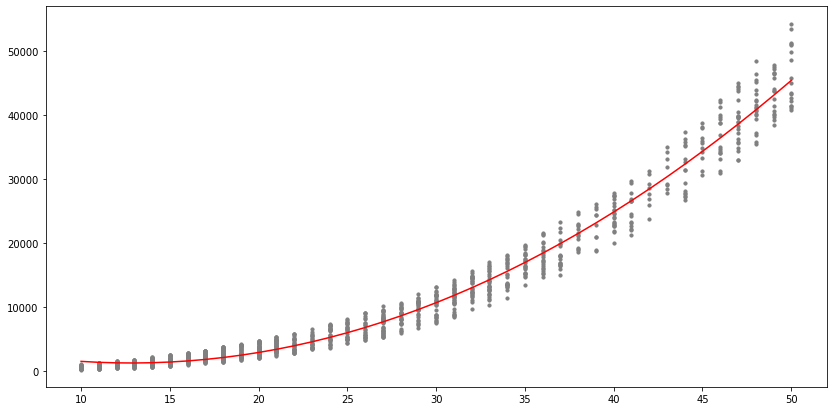

In [2]:
# X and y have to be two-domentional matrices
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

# Create a matrix of polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_hat = model.predict(X_poly)

# Plot hypothesis over datapoints
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(7)
plt.scatter(X, y, s=10, color="gray")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_hat), key=sort_axis)
X, y_hat = zip(*sorted_zip)
plt.plot(X, y_hat, color="red")
plt.show()




Conclusion for the plot above

## Metrics
Use metrics such as RMSE/R2/Accuracy to evaluate the model

In [3]:
# metrics
rmse = np.sqrt(mean_squared_error(y,y_hat))
r2 = r2_score(y,y_hat)
print(rmse)
print(r2)

18092.197609734863
-1.2435126017065086


## Hyperparameters
- Briefly explain LR and num of iterations and tradeofs (when using gradient descent)
- Build a custom Class LinearRegressionWithGD that accepts hyperparams (explain why we have to) (sklearn does it automatically for us)
- Train model with a different number of iterations, ploting cost X iteration (use something too low, too high and something optimal)
- Gather metricts for best model, compare with the previous

- Animations showing the effects of learning rate on taining time go on next Unit

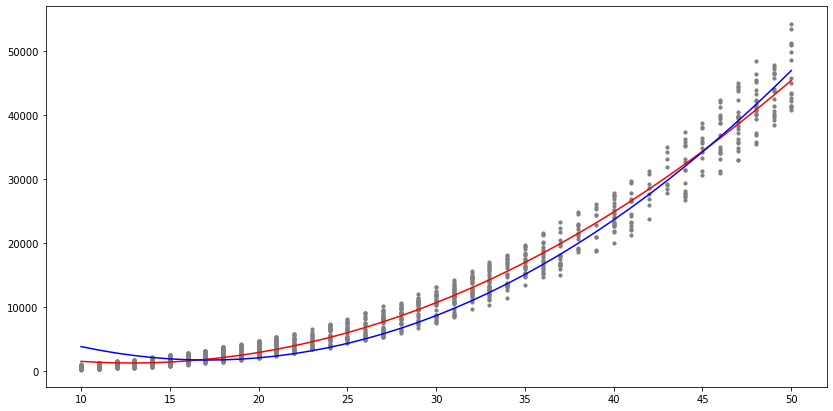

In [4]:

# Use a custom Polynomial Linear Regression implementation
import PolynomialLinearRegression as plr



X = dataset["Account Age"].values.reshape(-1,1)
y = dataset["Total Accrued"].values  #.reshape(-1,1)

# Initialize and train model
# setting values for learning rate and number of iterations
model2 = plr.PolynomialLinearRegression()
weights, J_history = model2.fit(X, y, learning_rate=0.01, num_iters=300)


# Generate predictins based on original dataset
y_hat2 = model2.predict(X)

# Plot previous and new predictions over datapoints
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(7)
plt.scatter(X, y, s=10, color="gray")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_hat2), key=sort_axis)
X, y_hat2 = zip(*sorted_zip)
plt.plot(X, y_hat, color="red")
plt.plot(X, y_hat2, color="blue")
plt.show()


## Summary

- Recall what Polynomial Regression is and why we need it
- Recall what hyperparams are and how they influenced the model.
